In [44]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


In [45]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [46]:
img = cv2.imread("eyes/ClosedFace/closed_eye_0001.jpg_face_1.jpg")
img.shape

(100, 100, 3)

In [47]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 98, 98, 200)       2000      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 52900)            

In [49]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [51]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
55/55 [==============================] - ETA: 0s - loss: 0.7219 - accuracy: 0.5321WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
55/55 [==============================] - 99s 2s/step - loss: 0.7219 - accuracy: 0.5321 - val_loss: 0.6796 - val_accuracy: 0.5894
Epoch 2/20
55/55 [==============================] - 99s 2s/step - loss: 0.6296 - accuracy: 0.6353 - val_loss: 0.4933 - val_accuracy: 0.7661
Epoch 3/20
55/55 [==============================] - 99s 2s/step - loss: 0.4863 - accuracy: 0.7683 - val_

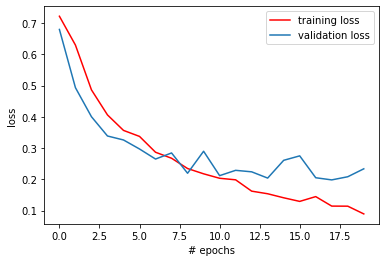

In [52]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

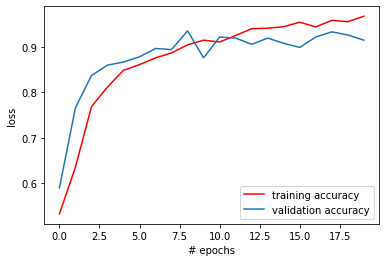

In [53]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [54]:
print(model.evaluate(test_data,test_target))

8/8 [==============================] - 3s 317ms/step - loss: 0.2933 - accuracy: 0.9012
[0.29328179359436035, 0.9012345671653748]
